In [1]:
from modules.lstm_encoder_decoder import LSTMEncoderDecoder
import numpy as np
from modules.callbacks import PlotLosses
import keras
import os

Using TensorFlow backend.


## Training

In [2]:
model = LSTMEncoderDecoder(
    source_path='./features/lstm/2_steps/',
    #weights_path='./convnet_weights/weights.30-0.92-66.63.hdf5',
    lr=0.00001,
)

In [3]:
model.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 2, 6144)      0                                            
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2, 6144)      0           input[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2, 4096)      25169920    dropout_1[0][0]                  
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2, 4096)      0           dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (D

In [4]:
plot_losses = PlotLosses()
checkpoint = keras.callbacks.ModelCheckpoint(
    './convnet_weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=False, 
    save_weights_only=True, 
    mode='auto', 
    period=1,
)
callbacks = [plot_losses, checkpoint]

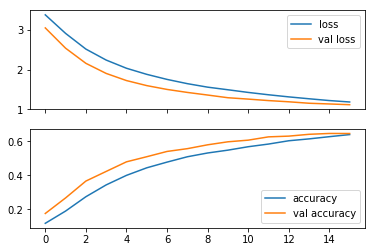

Epoch 1
-----------------------
- Loss: 3.38042702244
- Accuracy: 0.118477977705
- Validation loss: 3.05077852324
- Validation accuracy: 0.176352705082
 
Epoch 2
-----------------------
- Loss: 2.91285993072
- Accuracy: 0.190530796846
- Validation loss: 2.53947793506
- Validation accuracy: 0.267869073427
 
Epoch 3
-----------------------
- Loss: 2.51717844263
- Accuracy: 0.274884892992
- Validation loss: 2.15794459374
- Validation accuracy: 0.367067470281
 
Epoch 4
-----------------------
- Loss: 2.24014446875
- Accuracy: 0.344522630886
- Validation loss: 1.90309687607
- Validation accuracy: 0.423847695988
 
Epoch 5
-----------------------
- Loss: 2.03356568898
- Accuracy: 0.400625487329
- Validation loss: 1.72309540986
- Validation accuracy: 0.48029392026
 
Epoch 6
-----------------------
- Loss: 1.88000642124
- Accuracy: 0.445069933629
- Validation loss: 1.59593231716
- Validation accuracy: 0.510354050415
 
Epoch 7
-----------------------
- Loss: 1.7523014149
- Accuracy: 0.4786551996

KeyboardInterrupt: 

In [5]:
model.train(30, callbacks)

## Predictions

In [ ]:
model = LSTMEncoderDecoder(
    source_path='./features/lstm/2_steps/',
    weights_path='./convnet_weights/weights.13-0.85.hdf5',
)

In [ ]:
preds = model.predict('dev')

In [ ]:
true_classes = None

for i in range(model.validation_steps):
    if true_classes is None:
        true_classes = np.load('./features/lstm/2_steps/classes_dev_' + str(i) + '.npy')
    else:
        classes = np.load('./features/lstm/2_steps/classes_dev_' + str(i) + '.npy')
        true_classes = np.concatenate([true_classes, classes], axis=0)
true_classes = np.argmax(true_classes[:,2,:], axis=1)

In [ ]:
np.sum(true_classes == preds) / len(true_classes)